<a href="https://colab.research.google.com/github/viviantram03/labb-1/blob/main/AI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# data acquisition
# load the dataset
df = pd.read_csv('Air_Pollution_data.csv')

In [ ]:
# select features (pollutants) and target (PM2.5)
# use other pollutants to infer PM2.5 levels
features = ['co', 'no', 'no2', 'o3', 'so2','nh3', 'co2']
target = 'pm2_5';

# drop rows with missing values to ensure clean training data
data = df[features + [target]].dropna()

# split data into training (70%) and testing (30%) sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [ ]:
# model A: linear regression (baseline)
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# model B: random forest regressor (advanced)
print("Training Random Forest...")
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Training Linear Regression...
Training Random Forest...


In [ ]:
# evaluation

# calculate R2 score (how well the model explains variance)
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

# calculate MAE (average error in real units)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# print results
print("\n" + "="*50)
print("Final Results")
print("="*50)
print(f"Linear Regression: -> R2: {r2_lr:.4f} | MAE: {mae_lr: .4f} ")
print(f"Random Forest: -> R2: {r2_rf:.4f} | MAE: {mae_rf: .4f}")
print("="*50)


Final Results
Linear Regression: -> R2: 0.9227 | MAE:  43.2665 
Random Forest: -> R2: 0.9454 | MAE:  33.9055


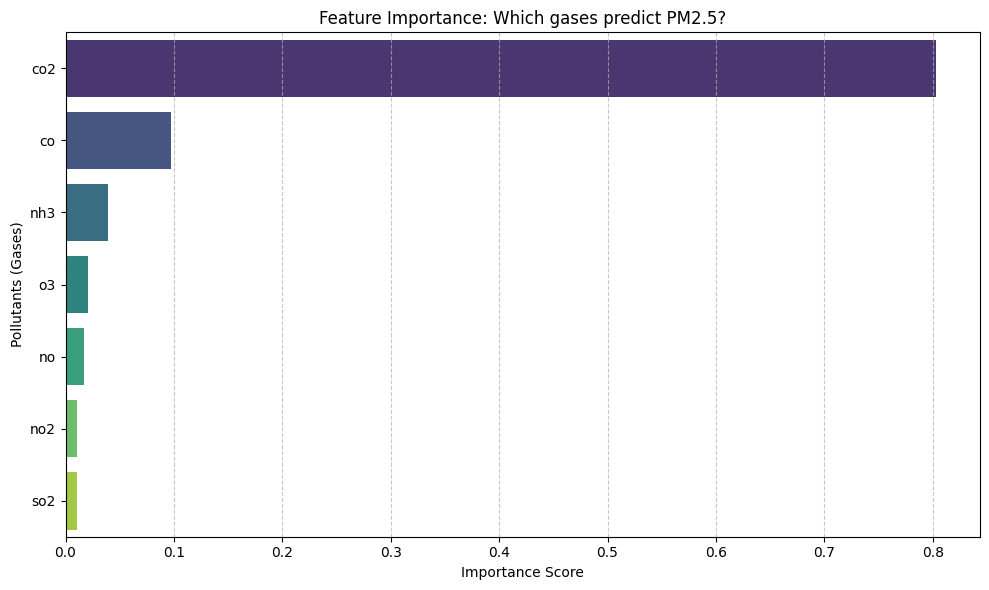

In [ ]:
# visualization (analysis)

# plotting feature importance to see which pollutants drive PM2.5 levels
plt.figure(figsize=(10,6))

feature_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis', hue=feature_imp.index, legend=False)

plt.title('Feature Importance: Which gases predict PM2.5?')
plt.xlabel('Importance Score')
plt.ylabel('Pollutants (Gases)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
